In [1]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt

# Supervised, Semi-Supervised, and Unsupervised Learning

## a)

In [2]:
df=pd.read_csv("wdbc.data", sep=",",header=None);
data = np.array(df)
X = np.array(data[:, 2:], dtype=float)
y = np.array(data[:, 1] == 'M', dtype=int)

p_test_size = int(np.sum(y) * 0.2)
n_test_size = int((y.shape[0] - np.sum(y)) * 0.2)
p_test_index = []
n_test_index = []
p_test_cur_size = 0
n_test_cur_size = 0

for i in range(y.shape[0]):
    if y[i] == 1 and p_test_cur_size < p_test_size:
        p_test_index.append(i)
        p_test_cur_size += 1
        
    if y[i] == 0 and n_test_cur_size < n_test_size:
        n_test_index.append(i)
        n_test_cur_size += 1
        
test_index = p_test_index + n_test_index
train_index = [i for i in np.arange(y.shape[0]) if i not in p_test_index and i not in n_test_index]

X_train = X[train_index]
X_test = X[test_index]
y_train = y[train_index]
y_test = y[test_index]

## b)

In [3]:
M = 30

def train_test_split(X, y, test_size=0.2):
    p_test_size = int(np.sum(y) * test_size)
    n_test_size = int((y.shape[0] - np.sum(y)) * test_size)
    p_index = np.argwhere(y == 1).flatten()
    n_index = np.argwhere(y == 0).flatten()
    np.random.shuffle(p_index)
    np.random.shuffle(n_index)
    p_test_index = p_index[:p_test_size]
    n_test_index = n_index[:n_test_size]
    test_index = np.hstack((p_test_index, n_test_index))
    train_index = [i for i in np.arange(y.shape[0]) if i not in test_index]

    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    return X_train, X_test, y_train, y_test

### Supervised Learning

In [4]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

n_folds = 5
accuracy = []
penalty = np.linspace(0.1, 2, 20)
for i in penalty:
    svm_clf = svm.LinearSVC(C=i, dual=False, penalty='l1', random_state=0, max_iter=3000)
    scores = cross_val_score(svm_clf, X_train, y_train, scoring='precision_macro', cv=n_folds)
    accuracy.append(scores.mean())
best_penalty = penalty[np.argmax(accuracy)]
print('The best penalty is :' + str(best_penalty))

The best penalty is :0.1


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, roc_curve, confusion_matrix
svm_accuracy_list=[]
svm_recall_list=[]
svm_precision_list=[]
svm_f1score_list=[]
svm_auc_list=[]
for i in range(M):
    svm_clf = svm.LinearSVC(C=best_penalty, dual=False, penalty='l1', random_state=0, max_iter=5000)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    svm_clf.fit(X_train,y_train)
    y_train_predict=svm_clf.predict(X_train)
    y_test_predict=svm_clf.predict(X_test)
    svm_accuracy_list.append([accuracy_score(y_train, y_train_predict), accuracy_score(y_test, y_test_predict)])
    svm_precision_list.append([precision_score(y_train, y_train_predict), precision_score(y_test, y_test_predict)])
    svm_recall_list.append([recall_score(y_train, y_train_predict), recall_score(y_test, y_test_predict)])
    svm_f1score_list.append([f1_score(y_train, y_train_predict), f1_score(y_test, y_test_predict)])
    train_decision_score = svm_clf.decision_function(X_train)
    test_decision_score = svm_clf.decision_function(X_test)

    svm_auc_list.append([roc_auc_score(y_train, train_decision_score), roc_auc_score(y_test, test_decision_score)])

In [6]:
print('training set:')
print('Average accuracy: ' + str(np.mean(np.array(svm_accuracy_list)[:, 0])))
print('Average precision: ' + str(np.mean(np.array(svm_precision_list)[:, 0])))
print('Average recall: ' + str(np.mean(np.array(svm_recall_list)[:, 0])))
print('Average f1 score: ' + str(np.mean(np.array(svm_f1score_list)[:, 0])))
print('Average AUC: ' + str(np.mean(np.array(svm_auc_list)[:, 0])))
print('\n')
print('test set:')
print('Average accuracy: ' + str(np.mean(np.array(svm_accuracy_list)[:, 1])))
print('Average precision: ' + str(np.mean(np.array(svm_precision_list)[:, 1])))
print('Average recall: ' + str(np.mean(np.array(svm_recall_list)[:, 1])))
print('Average f1 score: ' + str(np.mean(np.array(svm_f1score_list)[:, 1])))
print('Average AUC: ' + str(np.mean(np.array(svm_auc_list)[:, 1])))

training set:
Average accuracy: 0.9850146198830408
Average precision: 0.991196690417883
Average recall: 0.9684313725490193
Average f1 score: 0.9796656131781147
Average AUC: 0.9970972165089812


test set:
Average accuracy: 0.9707964601769912
Average precision: 0.9750156587631587
Average recall: 0.9460317460317459
Average f1 score: 0.9598916304120011
Average AUC: 0.9931701319025262


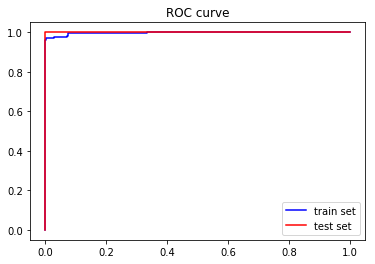

In [7]:
fprs, tprs, threshold = roc_curve(y_train, train_decision_score)
plt.plot(fprs, tprs, c='b', label='train set')
svm_fprs, svm_tprs, threshold = roc_curve(y_test, test_decision_score)
plt.plot(svm_fprs, svm_tprs, c='r', label='test set')
plt.title('ROC curve')
plt.legend()

In [8]:
train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
print('train_confusion_matrix:')
print(train_confusion_matrix)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('test_confusion_matrix:')
print(test_confusion_matrix)

train_confusion_matrix:
[[285   1]
 [  6 164]]
test_confusion_matrix:
[[70  1]
 [ 0 42]]


### Semi-Supervised Learning/ Self-training

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train_label, X_train_nolabel, y_train_label, y_train_nolabel = train_test_split(X_train, y_train)

n_folds = 5
accuracy = []
penalty = np.linspace(0.1, 2, 20)
for i in penalty:
    svm_clf = svm.LinearSVC(C=i, dual=False, penalty='l1', random_state=0, max_iter=5000)
    scores = cross_val_score(svm_clf, X_train_label, y_train_label, scoring='precision_macro', cv=n_folds)
    accuracy.append(scores.mean())
best_penalty = penalty[np.argmax(accuracy)]
print('The best penalty is :' + str(best_penalty))

The best penalty is :0.8999999999999999


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import *
semi_accuracy_list=[]
semi_recall_list=[]
semi_precision_list=[]
semi_f1score_list=[]
semi_auc_list=[]
for i in range(M):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_train_label, X_train_nolabel, y_train_label, y_train_nolabel = train_test_split(X_train, y_train, test_size=0.5)

    while(X_train_nolabel.shape[0] >0):
        svm_clf = svm.LinearSVC(C=best_penalty, dual=False, penalty='l1', random_state=0, max_iter=5000)
        svm_clf.fit(X_train_label, y_train_label)
        distances = np.abs(svm_clf.decision_function(X_train_nolabel))
        farthest_index = np.argmax(distances)
        farthest_point = X_train_nolabel[farthest_index].reshape(1, -1)
        X_train_label = np.vstack((X_train_label, farthest_point))
        X_train_nolabel = np.delete(X_train_nolabel, farthest_index, axis=0)
        y_train_label = np.hstack((y_train_label, svm_clf.predict(farthest_point)))
    
    y_train_label_predict=svm_clf.predict(X_train_label)
    y_test_predict=svm_clf.predict(X_test)
    semi_accuracy_list.append([accuracy_score(y_train_label, y_train_label_predict), accuracy_score(y_test, y_test_predict)])
    semi_precision_list.append([precision_score(y_train_label, y_train_label_predict), precision_score(y_test, y_test_predict)])
    semi_recall_list.append([recall_score(y_train_label, y_train_label_predict), recall_score(y_test, y_test_predict)])
    semi_f1score_list.append([f1_score(y_train_label, y_train_label_predict), f1_score(y_test, y_test_predict)])
    train_label_decision_score = svm_clf.decision_function(X_train_label)
    test_decision_score = svm_clf.decision_function(X_test)

    semi_auc_list.append([roc_auc_score(y_train_label, train_label_decision_score), roc_auc_score(y_test, test_decision_score)])

In [11]:
print('training set:')
print('Average accuracy: ' + str(np.mean(np.array(semi_accuracy_list)[:, 0])))
print('Average precision: ' + str(np.mean(np.array(semi_precision_list)[:, 0])))
print('Average recall: ' + str(np.mean(np.array(semi_recall_list)[:, 0])))
print('Average f1 score: ' + str(np.mean(np.array(semi_f1score_list)[:, 0])))
print('Average AUC: ' + str(np.mean(np.array(semi_auc_list)[:, 0])))
print('\n')
print('test set:')
print('Average accuracy: ' + str(np.mean(np.array(semi_accuracy_list)[:, 1])))
print('Average precision: ' + str(np.mean(np.array(semi_precision_list)[:, 1])))
print('Average recall: ' + str(np.mean(np.array(semi_recall_list)[:, 1])))
print('Average f1 score: ' + str(np.mean(np.array(semi_f1score_list)[:, 1])))
print('Average AUC: ' + str(np.mean(np.array(semi_auc_list)[:, 1])))

training set:
Average accuracy: 0.9960526315789473
Average precision: 0.9993923832536481
Average recall: 0.9898978303601595
Average f1 score: 0.9946042596426443
Average AUC: 0.9997575554794318


test set:
Average accuracy: 0.9557522123893805
Average precision: 0.951775500230641
Average recall: 0.9293650793650792
Average f1 score: 0.9395233056227603
Average AUC: 0.9847753185781355


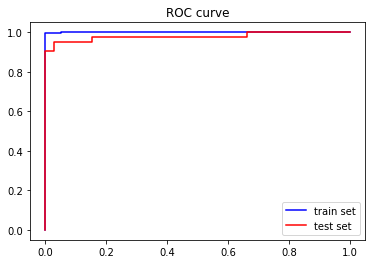

In [12]:
fprs, tprs, threshold = roc_curve(y_train_label, train_label_decision_score)
plt.plot(fprs, tprs, c='b', label='train set')
semi_fprs, semi_tprs, threshold = roc_curve(y_test, test_decision_score)
plt.plot(semi_fprs, semi_tprs, c='r', label='test set')
plt.title('ROC curve')
plt.legend()

In [13]:
train_confusion_matrix = confusion_matrix(y_train_label, y_train_label_predict)
print('train_confusion_matrix:')
print(train_confusion_matrix)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('test_confusion_matrix:')
print(test_confusion_matrix)

train_confusion_matrix:
[[285   0]
 [  1 170]]
test_confusion_matrix:
[[69  2]
 [ 2 40]]


### Unsupervised Learning

In [14]:
from sklearn.cluster import KMeans
accuracy_list=[]
recall_list=[]
precision_list=[]
f1score_list=[]
auc_list=[]
for i in range(M):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    kcluster = KMeans(n_clusters=2, init='random', n_init=15)
    kcluster.fit(X_train)
    distances = kcluster.transform(X_train)
    cluster1_point_index = np.argsort(distances[:, 0])[:30]
    cluster2_point_index = np.argsort(distances[:, 1])[:30]
    cluster_point_index = np.hstack((cluster1_point_index, cluster2_point_index))

    cluster_point_cluster_label = kcluster.labels_[cluster_point_index]
    cluster_point_ture_label = y_train[cluster_point_index]
    s1 = np.sum(cluster_point_cluster_label == cluster_point_ture_label)
    s2 = np.sum((cluster_point_cluster_label==0) == cluster_point_ture_label)
    if s2 > s1:
        cluster_point_cluster_label = cluster_point_cluster_label==0
    
    accuracy_list.append(accuracy_score(cluster_point_ture_label, cluster_point_cluster_label))
    precision_list.append(precision_score(cluster_point_ture_label, cluster_point_cluster_label))
    recall_list.append(recall_score(cluster_point_ture_label, cluster_point_cluster_label))
    f1score_list.append(f1_score(cluster_point_ture_label, cluster_point_cluster_label))
    fpr,tpr,thresholds = roc_curve(cluster_point_ture_label, cluster_point_cluster_label)
    auc_list.append(auc(fpr, tpr))

In [15]:
print('cluster_point set:')
print('Average accuracy: ' + str(np.mean(np.array(accuracy_list))))
print('Average precision: ' + str(np.mean(np.array(precision_list))))
print('Average recall: ' + str(np.mean(np.array(recall_list))))
print('Average f1 score: ' + str(np.mean(np.array(f1score_list))))
print('Average AUC: ' + str(np.mean(np.array(auc_list))))

cluster_point set:
Average accuracy: 0.9883333333333335
Average precision: 1.0
Average recall: 0.9774193548387099
Average f1 score: 0.9885245901639341
Average AUC: 0.9887096774193549


Text(0.5, 1.0, 'ROC curve')

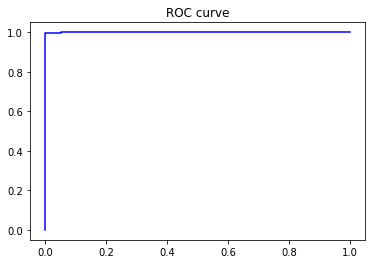

In [16]:
plt.plot(fprs, tprs, c='b')
plt.title('ROC curve')

In [17]:
cluster_point_confusion_matrix = confusion_matrix(cluster_point_ture_label, cluster_point_cluster_label)
print('confusion_matrix:')
print(cluster_point_confusion_matrix)

confusion_matrix:
[[29  0]
 [ 1 30]]


In [18]:
km_accuracy_list=[]
km_recall_list=[]
km_precision_list=[]
km_f1score_list=[]
km_auc_list=[]
for i in range(M):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    kcluster = KMeans(n_clusters=2, init='random', n_init=15)
    kcluster.fit(X_train)
    y_test_predict = kcluster.predict(X_test)
    s1 = np.sum(y_test == y_test_predict)
    s2 = np.sum(y_test == (y_test_predict==0))
    if s2 > s1:
        y_test_predict = y_test_predict==0
        
    km_accuracy_list.append(accuracy_score(y_test, y_test_predict))
    km_precision_list.append(precision_score(y_test, y_test_predict))
    km_recall_list.append(recall_score(y_test, y_test_predict))
    km_f1score_list.append(f1_score(y_test, y_test_predict))
    km_fprs,km_tprs,thresholds = roc_curve(y_test, y_test_predict)
    km_auc_list.append(auc(km_fprs, km_tprs))

In [19]:
print('test set:')
print('Average accuracy: ' + str(np.mean(np.array(km_accuracy_list))))
print('Average precision: ' + str(np.mean(np.array(km_precision_list))))
print('Average recall: ' + str(np.mean(np.array(km_recall_list))))
print('Average f1 score: ' + str(np.mean(np.array(km_f1score_list))))
print('Average AUC: ' + str(np.mean(np.array(km_auc_list))))

test set:
Average accuracy: 0.9070796460176992
Average precision: 0.9244792676835717
Average recall: 0.8182539682539683
Average f1 score: 0.8670144637733621
Average AUC: 0.888939190699754


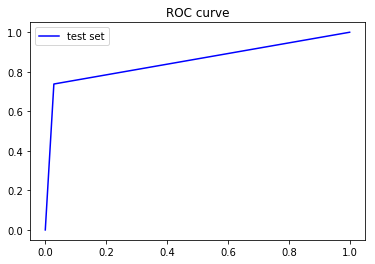

In [20]:
plt.plot(km_fprs, km_tprs, c='b', label='test set')
plt.title('ROC curve')
plt.legend()

In [21]:
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('test_confusion_matrix:')
print(test_confusion_matrix)

test_confusion_matrix:
[[69  2]
 [11 31]]


### Spectral Clustering

In [22]:
from sklearn.cluster import SpectralClustering
sp_accuracy_list=[]
sp_recall_list=[]
sp_precision_list=[]
sp_f1score_list=[]
sp_auc_list=[]
for i in range(M):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    scluster = SpectralClustering(n_clusters=2, gamma=1.0, affinity='rbf')
    scluster.fit(X_train)
    y_test_predict = scluster.fit_predict(X_test)
    s1 = np.sum(y_test == y_test_predict)
    s2 = np.sum(y_test == (y_test_predict==0))
    if s2 > s1:
        y_test_predict = y_test_predict==0
        
    sp_accuracy_list.append(accuracy_score(y_test, y_test_predict))
    sp_precision_list.append(precision_score(y_test, y_test_predict))
    sp_recall_list.append(recall_score(y_test, y_test_predict))
    sp_f1score_list.append(f1_score(y_test, y_test_predict))
    sp_fprs,sp_tprs,thresholds = roc_curve(y_test, y_test_predict)
    sp_auc_list.append(auc(sp_fprs, sp_tprs))

In [23]:
print('test set:')
print('Average accuracy: ' + str(np.mean(np.array(sp_accuracy_list))))
print('Average precision: ' + str(np.mean(np.array(sp_precision_list))))
print('Average recall: ' + str(np.mean(np.array(sp_recall_list))))
print('Average f1 score: ' + str(np.mean(np.array(sp_f1score_list))))
print('Average AUC: ' + str(np.mean(np.array(sp_auc_list))))

test set:
Average accuracy: 0.6445427728613567
Average precision: 0.5986111111111112
Average recall: 0.05793650793650794
Average f1 score: 0.08906339092832524
Average AUC: 0.5247429018555779


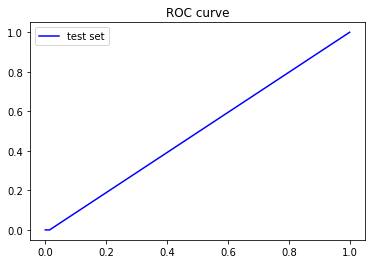

In [24]:
plt.plot(sp_fprs, sp_tprs, c='b', label='test set')
plt.title('ROC curve')
plt.legend()

In [25]:
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('test_confusion_matrix:')
print(test_confusion_matrix)

test_confusion_matrix:
[[70  1]
 [42  0]]


### Comparison

In [1]:
f1_score = []
f1_score.append(np.mean(np.array(svm_f1score_list)[:, 1]))
f1_score.append(np.mean(np.array(semi_f1score_list)[:, 1]))
f1_score.append(np.mean(np.array(km_f1score_list)))
f1_score.append(np.mean(np.array(sp_f1score_list)))

label_list = ['Supervised', 'Semi-Supervised', 'k-means', 'spectral']
for i in range(len(f1_score)):
    plt.scatter(i, f1_score[i], label=label_list[i])
plt.ylabel('f1 score')
plt.legend()

NameError: name 'np' is not defined

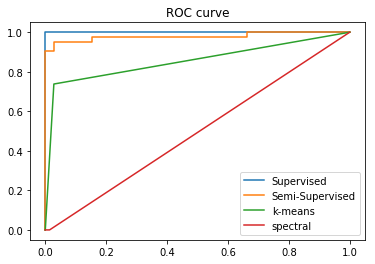

In [27]:
fprs = [svm_fprs, semi_fprs, km_fprs, sp_fprs]
tprs = [svm_tprs, semi_tprs, km_tprs, sp_tprs]
for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], label=label_list[i])
plt.title('ROC curve')
plt.legend()

# Active Learning Using Support Vector Machines

In [40]:
import warnings
warnings.filterwarnings('ignore')
print('ignore Warnning of the minimum number of members')

ignore Warnning of the minimum number of members


In [20]:
import numpy as np
txtdirector = 'data_banknote_authentication.txt'
def getdata():
    file_object = open(txtdirector)
    file_content = file_object.read().splitlines()
    p_datas, p_targets = [], []
    for line in file_content:
        line = line.split(',')
        p_datas.append(list(map(float, line[:-1])))
        p_targets.append(int(line[-1]))
    p_datas = np.array(p_datas)
    p_targets = np.array(p_targets)
    return(p_datas, p_targets)
all_datas,all_targets=getdata()
print('data_shape:', all_datas.shape,'targets_shape:',all_targets.shape)

data_shape: (1372, 4) targets_shape: (1372,)


In [22]:
import random
from collections import Counter
def do_shuffle(p_datas, p_targets):
    indexlist = list(range(len(p_datas)))
    success = False
    while not success:
        random.shuffle(indexlist)
        shuffled_datas = p_datas[indexlist]
        shuffled_targets = p_targets[indexlist]
        check = shuffled_targets[:10]
        count = Counter(check)
        if count[0] >= 3 and count[1] >= 3:
            success = True
    return(shuffled_datas, shuffled_targets)
print('targets before shuffle:',all_targets[:10])
shuffled_datas,shuffled_targets=do_shuffle(all_datas,all_targets)
print('targets after shuffle:',shuffled_targets[:10],'---- at least 3 member in a class')

targets before shuffle: [0 0 0 0 0 0 0 0 0 0]
targets after shuffle: [0 0 1 1 0 0 1 0 0 0] ---- at least 3 member in a class


In [23]:
def get_train_test(p_datas, p_targets):
    train_data, train_target = shuffled_datas[:900], shuffled_targets[:900]
    test_data, test_target = shuffled_datas[900:], shuffled_targets[900:]
    return (train_data, train_target), (test_data, test_target)
(train_data, train_target), (test_data, test_target) =get_train_test(shuffled_datas,shuffled_targets)
print('train_nums:',train_target.shape,'test_nums:',test_target.shape)

train_nums: (900,) test_nums: (472,)


In [32]:
from sklearn import model_selection, svm
C_grid = [{'C': list(10**i for i in range(-6, 6))}]
print('grid choose range:',C_grid[0]['C'])

grid choose: [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]


In [52]:
def get_grided_model(p_datas, p_targets):
    grid_svc = svm.LinearSVC(penalty='l1', dual=False, max_iter=20000, tol=1e-3)
    if len(p_targets) == 10:
        cv_num = 5
    else:
        cv_num = 10
    grid_search = model_selection.GridSearchCV(grid_svc, C_grid, n_jobs=-1, cv=cv_num, iid=True)
    grid_search.fit(p_datas, p_targets)
    return(grid_search.best_estimator_)
temp_svm=get_grided_model(train_data[:100], train_target[:100])
print('train and get best svm in gave 100 data:')
print(temp_svm.get_params)

Wall time: 0 ns
train and get best svm in gave 100 data:
<bound method BaseEstimator.get_params of LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=20000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)>


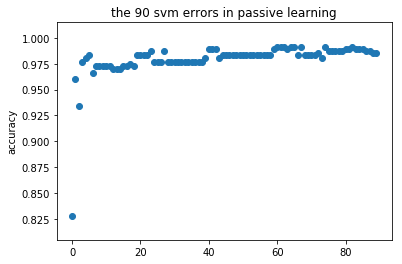

In [55]:
temp_accuracy = list()
for i in range(90):
    rangeofdata = 10*(i+1)
    pool_datas = train_data[:rangeofdata]
    pool_targets = train_target[:rangeofdata]
    tempsvc = get_grided_model(pool_datas, pool_targets)
    tempsvc.fit(pool_datas, pool_targets)
    predicts = tempsvc.predict(test_data)
    accu = sum(predicts == test_target)/472
    temp_accuracy.append(accu)
plt.title('the 90 svm errors in passive learning')
plt.ylabel('accuracy')
plt.scatter(list(range(90)),temp_accuracy)

In [51]:
def passive_learning(p_train_datas, p_train_targets, p_test_datas, p_test_targets):
    print('start')
    accuracy = list()
    for repeat in range(50):
        shuffled_train_datas, shuffled_train_targets = do_shuffle(p_train_datas, p_train_targets)
        print('passive learning: shuffle data and running for %s time'% repeat)
        for i in range(90):
            rangeofdata = 10*(i+1)
            pool_datas = shuffled_train_datas[:rangeofdata]
            pool_targets = shuffled_train_targets[:rangeofdata]
            tempsvc = get_grided_model(pool_datas, pool_targets)
            tempsvc.fit(pool_datas, pool_targets)
            predicts = tempsvc.predict(p_test_datas)
            accu = sum(predicts == p_test_targets)/472
            accuracy.append(accu)
    print('end')
    return(accuracy)
accu_passive = passive_learning(train_data, train_target, test_data, test_target)

passive learning: shuffle data and running for 0 time
passive learning: shuffle data and running for 1 time
passive learning: shuffle data and running for 2 time
passive learning: shuffle data and running for 3 time
passive learning: shuffle data and running for 4 time
passive learning: shuffle data and running for 5 time
passive learning: shuffle data and running for 6 time
passive learning: shuffle data and running for 7 time
passive learning: shuffle data and running for 8 time
passive learning: shuffle data and running for 9 time
passive learning: shuffle data and running for 10 time
passive learning: shuffle data and running for 11 time
passive learning: shuffle data and running for 12 time
passive learning: shuffle data and running for 13 time
passive learning: shuffle data and running for 14 time
passive learning: shuffle data and running for 15 time
passive learning: shuffle data and running for 16 time
passive learning: shuffle data and running for 17 time
passive learning: sh

mean accuracy of passive learning:


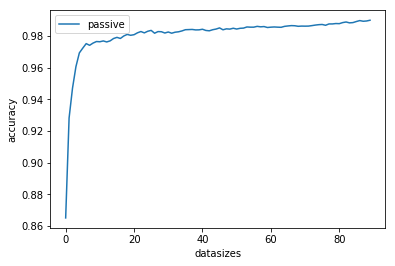

In [61]:
print('mean accuracy of passive learning:')
accu_passive = np.array(accu_passive).reshape(50, 90)
passive_list = np.mean(accu_passive, axis=0)
x_list = list(range(len(passive_list)))
plt.xlabel('datasizes')
plt.ylabel('accuracy')
plt.plot(x_list, passive_list, label='passive')
plt.legend()

In [73]:
import math
def get_distance(coef, intercept, data):
    sums = math.sqrt(np.sum(coef**2))
    return abs(np.sum(coef*data)+intercept)/sums

dis_list = list()
for data in test_data[:50]:
    dis_list.append(get_distance(temp_svm.coef_, temp_svm.intercept_, data))
print('distance of 50 target in rest data:')
print(dis_list)

distance of 50 target in rest data
[array([5.01964907]), array([2.83491661]), array([2.94533531]), array([3.20191512]), array([3.25060413]), array([2.40388446]), array([2.34011933]), array([2.17831727]), array([3.77637839]), array([3.04199711]), array([3.80133556]), array([0.3404323]), array([1.27425932]), array([2.70552422]), array([2.32550519]), array([2.04249005]), array([2.22711334]), array([2.16031398]), array([2.65817074]), array([1.93319338]), array([0.41534318]), array([1.68317158]), array([1.45375951]), array([4.88322418]), array([3.10030602]), array([2.46116103]), array([2.87282959]), array([3.06149233]), array([3.11152861]), array([1.79410724]), array([3.63673911]), array([3.99233595]), array([2.78669093]), array([1.91490352]), array([3.80121759]), array([3.96721617]), array([2.16691529]), array([2.83426757]), array([1.81890348]), array([2.14487348]), array([2.37404468]), array([1.15590899]), array([1.84760438]), array([2.50229637]), array([3.95267291]), array([1.84347915]),

In [90]:
import heapq
def get_nearst(coef, intercept, p_datas, p_targets):
    if len(p_datas) == 0:
        return(p_datas, p_targets, p_datas, p_targets)
    else:
        selected_datas = list()
        selected_targets = list()
        rest_datas = list(p_datas.copy())
        rest_targets = list(p_targets.copy())
        distance_list = list()
        for data in p_datas:
            distance_list.append(get_distance(coef, intercept, data))
        smallest_index = list(map(distance_list.index, heapq.nsmallest(10, distance_list)))
        smallest_index.sort(key=None, reverse=True)
        for index in smallest_index:
            selected_datas.append(p_datas[index])
            selected_targets.append(p_targets[index])
            rest_datas.pop(index)
            rest_targets.pop(index)
        return(np.array(selected_datas), np.array(selected_targets), np.array(rest_datas), np.array(rest_targets))

def active_learning(p_train_datas, p_train_targets, p_test_datas, p_test_targets):
    print('strat')
    accuracy = list()
    for repeat in range(50):
        shuffled_train_datas, shuffled_train_targets = do_shuffle(p_train_datas, p_train_targets)
        pool_datas, pool_targets = shuffled_train_datas[:10], shuffled_train_targets[:10]
        rest_datas, rest_targets = shuffled_train_datas[10:], shuffled_train_targets[10:]
        print('active learning: shuffle data and running for %s time'% repeat)
        for i in range(90):
            tempsvc = get_grided_model(pool_datas, pool_targets)
            tempsvc.fit(pool_datas, pool_targets)
            predicts = tempsvc.predict(p_test_datas)
            accu = sum(predicts == p_test_targets)/472
            accuracy.append(accu)
            choosed_datas, choosed_targets, rest_datas, rest_targets = get_nearst(tempsvc.coef_[0], tempsvc.intercept_[0], rest_datas, rest_targets)
            if not len(choosed_datas) == 0:
                pool_datas = np.vstack((pool_datas, choosed_datas))
                pool_targets = np.hstack((pool_targets, choosed_targets))
    print('end')
    return(accuracy)

accu_active = active_learning(train_data, train_target, test_data, test_target)

strat
active learning: shuffle data and running for 0 time
active learning: shuffle data and running for 1 time
active learning: shuffle data and running for 2 time
active learning: shuffle data and running for 3 time
active learning: shuffle data and running for 4 time
active learning: shuffle data and running for 5 time
active learning: shuffle data and running for 6 time
active learning: shuffle data and running for 7 time
active learning: shuffle data and running for 8 time
active learning: shuffle data and running for 9 time
active learning: shuffle data and running for 10 time
active learning: shuffle data and running for 11 time
active learning: shuffle data and running for 12 time
active learning: shuffle data and running for 13 time
active learning: shuffle data and running for 14 time
active learning: shuffle data and running for 15 time
active learning: shuffle data and running for 16 time
active learning: shuffle data and running for 17 time
active learning: shuffle data an

mean accuracy of active learning:


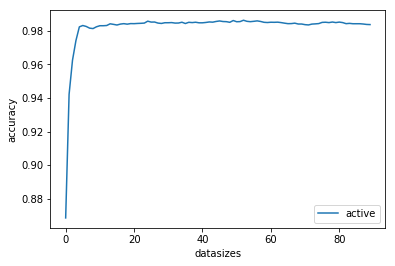

In [91]:
print('mean accuracy of active learning:')
accu_active = np.array(accu_active).reshape(50, 90)
active_list = np.mean(accu_active, axis=0)
x_list = list(range(len(active_list)))
plt.xlabel('datasizes')
plt.ylabel('accuracy')
plt.plot(x_list, active_list, label='active')
plt.legend()

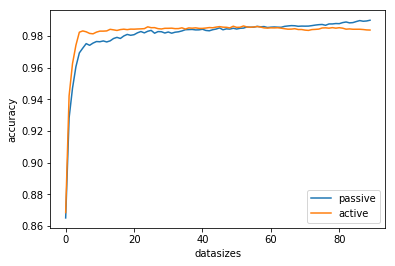

In [92]:
def show(accu_passive, accu_active):
    passive_list = np.mean(accu_passive, axis=0)
    active_list = np.mean(accu_active, axis=0)
    x_list = list(range(len(passive_list)))
    plt.plot(x_list, passive_list, label='passive')
    plt.plot(x_list, active_list, label='active')
    plt.legend()
    plt.xlabel('datasizes')
    plt.ylabel('accuracy')
show(accu_passive,accu_active)